# Imports

In [1]:
import typing

import matplotlib.pyplot as plt
from typing import *
import numpy as np
import skimage
from skimage import measure
from skimage import data, filters, exposure, feature
from skimage.filters import rank
from skimage.util.dtype import convert
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
import os

# Typing

In [2]:
from typing import List
Image = np.ndarray

# Utility functions

In [133]:
T = TypeVar('T')
def foreach(iterable: Iterable[T], fn: Callable[[T]]):
  [*map(lambda x: fn(*x), iterable)]

def flow(*fns: List[Callable[[T], T]]) -> Callable[[Iterable[T]], Iterable[T]]:
  def wrapper(iterable: Iterable[T]):
    for fn in fns: iterable = map(fn, iterable)
    return iterable
  return wrapper

TypeError: Callable must be used as Callable[[arg, ...], result].

# Image functions

In [127]:
planes_directory: str = 'resources/images/planes/'
output_directory: str = 'outputs/images/planes/'
def image_from(imagename: str, extension: str = 'jpg') -> Image:
  return plt.imread(f"{planes_directory}/{imagename}.{extension}")

def save_to(path: str, image: Image, extension: str = 'jpg', **kwargs):
  plt.imsave(f"{output_directory}/{path}.{extension}", image, **kwargs)

def show(image: Image, **kwargs):
  plt.imshow(image, **kwargs)

# Load plane data

In [141]:
planenames = [f'samolot{i:02}' for i in range(21)]
images = list(map(image_from, planenames))
planes = dict(zip(planenames, images))

# Find plane

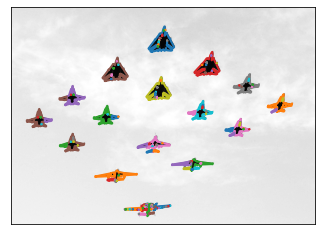

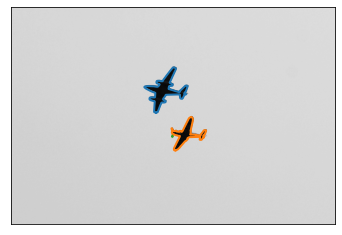

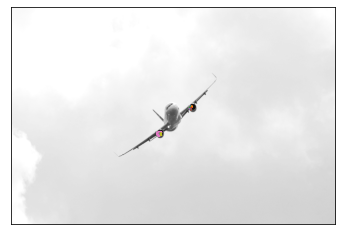

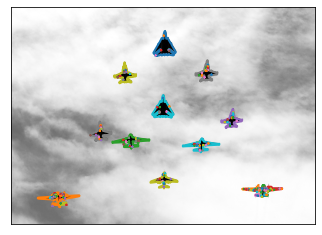

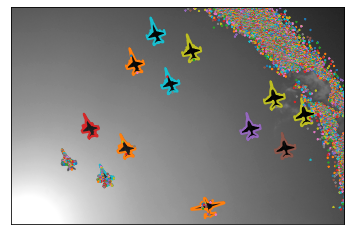

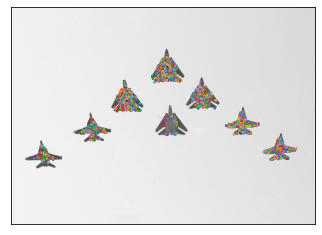

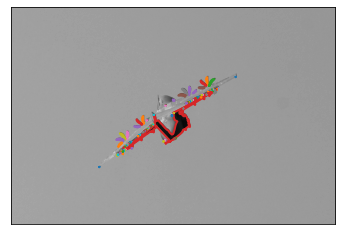

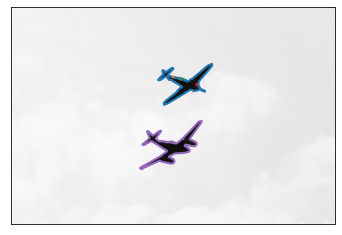

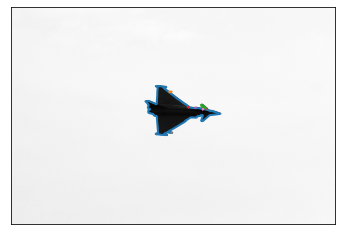

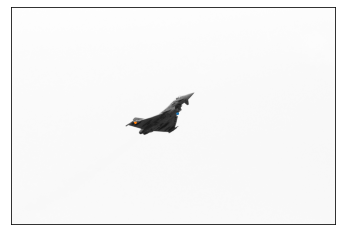

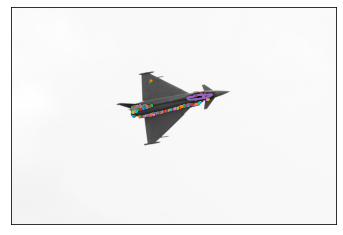

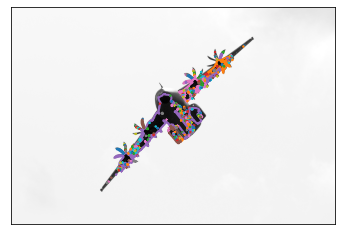

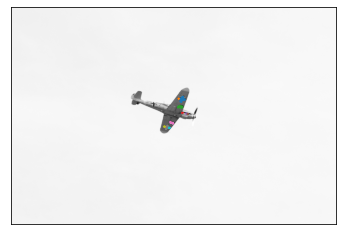

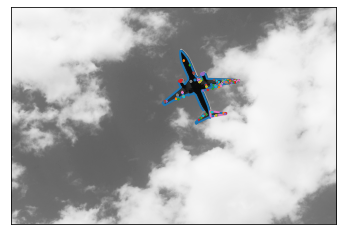

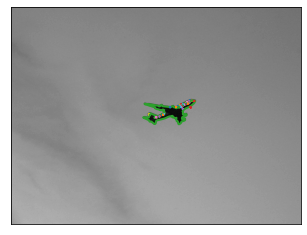

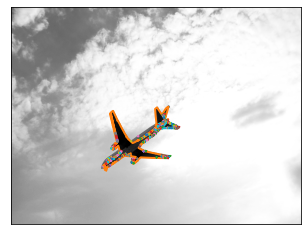

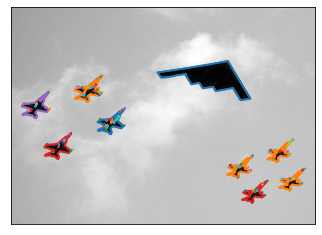

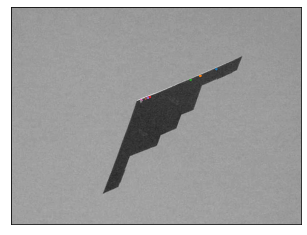

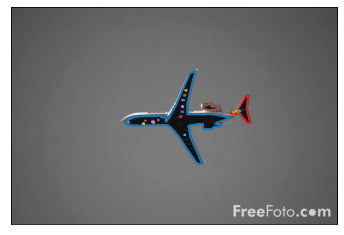

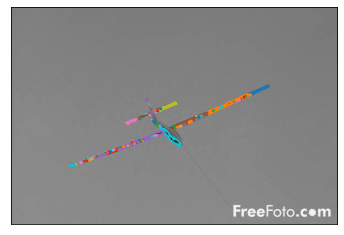

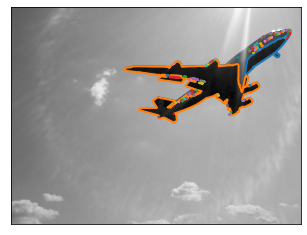

AttributeError: 'tuple' object has no attribute 'shape'

In [149]:
def create_contoured_image(image: Image) -> plt.Figure:
  def remove_ticks(axes: plt.Axes):
    axes.set_xticks([])
    axes.set_yticks([])

  (figure, axes) = plt.subplots()
  plt.imshow(image, cmap='Greys')

  for contour in find_plane_contours(image):
    axes.plot(contour[:, 1], contour[:, 0], linewidth=2)

  axes.axis('image')
  remove_ticks(axes)
  plt.show()
  # plt.savefig('temp.png')
  # image = plt.imread('temp.png')
  # os.remove('temp.png')
  # return image[:, :, :3]

def find_plane_contours(image: Image) -> List[Image]:
  return measure.find_contours(image, 0.8)

def as_gray(image: Image) -> Image:
  return 1 - rgb2gray(image)

processed_planes = list(flow(as_gray, create_contoured_image)(images))
foreach(zip(planenames, processed_planes), save_to)